# **Методы аппроксимации в интерполяции и прогнозировании цен NVIDIA**

## **Введение**
В этой тетради мы рассмотрим несколько методов интерполяции и аппроксимации, применяемых к набору данных, представляющему общие данные корпорации NVIDIA. Цель состоит в том, чтобы повысить точность прогнозов с помощью различных математических моделей.

### **Цели:**
- Применить различные методы аппроксимации к заданному набору данных.
- Проанализировать результаты этих моделей.
- Сравнить эффективность каждого метода.
- Использовать библиотеки Python, такие как "numpy", "scipy", "matplotlib" и "pandas", для реализации моделей.
  
Методы, которые мы будем изучать, включают:
- **Интерполяцию полиномом Лагранжа**
- **Интерполяция полиномом Ньютона**
- **Интерполяция кубическим сплайном**
- **Аппроксимация методом наименьших квадратов**
- **Аппроксимация наименьшими модулями**
- **Сигмовидные методы аппроксимации**
- **Корни полинома Чебышева для улучшения интерполяции**

---

Установим пропущенные библиотеки

In [ ]:
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install scipy

## **1. Загружаем датасет**

Мы начнем с загрузки и проверки набора данных. Набор данных содержит значения данные о стоимости акций NVIDIA (1/22/1999 - 11/16/2022) и может быть использован для дальнейшего анализа инвестиций.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('NVIDIA Corporation.csv', index_col='Date', parse_dates=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-01-22,0.488281,0.388021,0.437500,0.410156,271468800,0.376518
1999-01-25,0.458333,0.410156,0.442708,0.453125,51048000,0.415963
1999-01-26,0.467448,0.411458,0.458333,0.417969,34320000,0.383690
1999-01-27,0.429688,0.395833,0.419271,0.416667,24436800,0.382495
1999-01-28,0.419271,0.412760,0.416667,0.415365,22752000,0.381300


In [ ]:
df.columns  # if you want to have Date as a column instead of index, then remove argument "index_col='Date' from read_csv function"

---

## **2. Визуализируем данные**

Давайте построим график данных, чтобы получить представление о их поведении.

<Axes: xlabel='Date'>

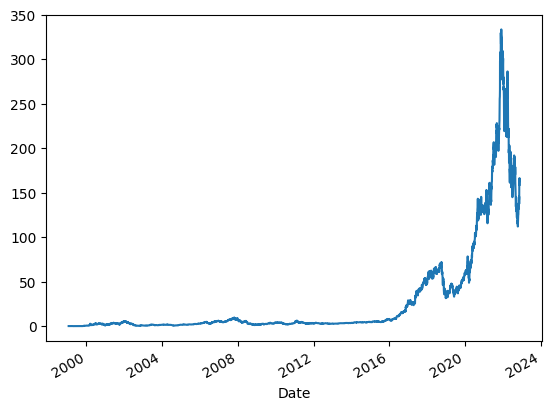

In [3]:
# Simplest way to plot data frame
df['Close'].plot()

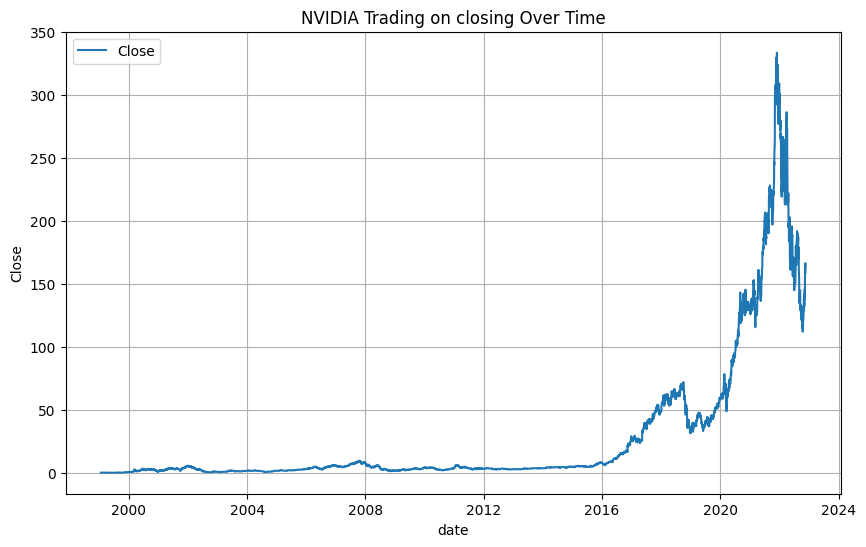

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close')
# plt.scatter(df['date'], df['Close'], color='red', label='Data Points')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('NVIDIA Trading on closing Over Time')
plt.legend()
plt.grid(True)
plt.show()

---

## **3. Интерполяция полиномом Лагранжа**

### Обзор метода:
Интерполяция Лагранжа - это метод построения многочлена, который проходит через заданный набор точек данных.

### Реализация:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd

Мы ограничиваем количество точек для интерполяции, потому что в противном случае у нас будет полином в степени 5000+, построение и последующее использование которого займет огромное количество времени. Мы предполагаем, что наибольшие и наименьшие точки будут влиять на интерполяцию больше, чем другие, но на самом деле это означает, что мы строим интерполяцию на основе выбросов, что на практике обычно неверно.

In [80]:
# Select the 5 highest and 5 lowest points based on 'Close' values
df_top5_high = df.nlargest(50, 'Close')
df_top5_low = df.nsmallest(50, 'Close')
df_top10 = pd.concat([df_top5_high, df_top5_low]).sort_index()
# print(df_top10)
print(len(df_top10))

100


In [81]:
# Convert index to numerical values for interpolation
dates_numeric = df_top10.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Create the Lagrange interpolating polynomial using the top 10 points
poly_lagrange = lagrange(dates_numeric, df_top10['Close'])
print(poly_lagrange)

C:\Users\Екатерина\.conda\envs\lab_1\Lib\site-packages\scipy\interpolate\_interpolate.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pt = poly1d(w[j])


            56              55             54              53
4.941e-324 x  - 1.388e-315 x  + 8.54e-306 x  - 1.207e-296 x 
               52              51              50              49
 + 1.679e-287 x  - 2.239e-278 x  + 2.867e-269 x  - 3.523e-260 x 
               48              47              46             45
 + 4.158e-251 x  - 4.712e-242 x  + 5.125e-233 x  - 5.35e-224 x 
               44              43              42            41
 + 5.359e-215 x  - 5.151e-206 x  + 4.749e-197 x  - 4.2e-188 x 
               40              39              38              37
 + 3.562e-179 x  - 2.895e-170 x  + 2.255e-161 x  - 1.682e-152 x 
               36              35             34              33
 + 1.202e-143 x  - 8.213e-135 x  + 5.37e-126 x  - 3.356e-117 x 
               32             31             30             29
 + 2.004e-108 x  - 1.142e-99 x  + 6.209e-91 x  - 3.218e-82 x 
              28             27             26             25
 + 1.588e-73 x  - 7.454e-65 x  + 3.326e-56 

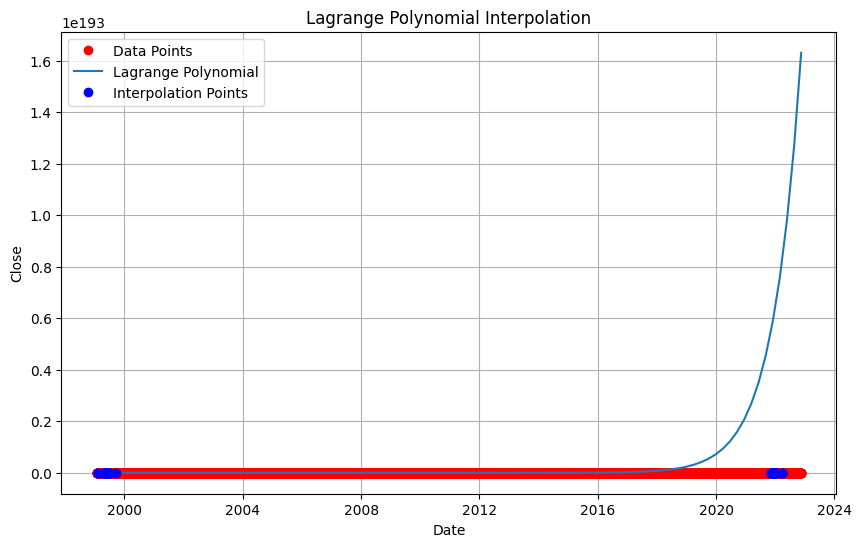

In [83]:
# Define a range of dates for plotting the interpolation
date_range = np.linspace(df.index[0].value // 10**9, df.index[-1].value // 10**9, 100)

# Calculate values by interpolation polynomial 
closing_lagrange = poly_lagrange(date_range)
# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_lagrange, label='Lagrange Polynomial')
plt.plot(df_top10.index, df_top10['Close'], 'bo', label='Interpolation Points')  # Add interpolation points
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Lagrange Polynomial Interpolation')
plt.legend()
plt.grid(True)
plt.show()

### Задача:
- Проанализируйте поведение интерполяции полиномом Лагранжа и ее пригодность для вашего набора данных.
- Попробуйте увеличить или уменьшить количество точек данных, чтобы увидеть, как это повлияет на интерполяцию.

1. При увеличении числа точек степень полинома возрастает, что усиливает колебания, особенно вблизи точек экстремумов. График становится хаотичным, и интерполяция хуже передаёт общий тренд.
2. Это подтверждает, что метод Лагранжа плохо подходит для большого количества точек и может быть нестабильным на краях интервала.


---

## **4. Интерполяция полиномом Ньютона**

### Обзор метода:
Метод Ньютона позволяет итеративно строить интерполяционный полином и в некоторых случаях может быть более стабильным, чем метод Лагранжа.

### Реализация:

In [44]:
from scipy.interpolate import BarycentricInterpolator

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd

Мы ограничиваем количество точек для интерполяции, потому что в противном случае у нас будет полином в степени 5000+, построение и последующее использование которого займет огромное количество времени. Мы предполагаем, что наибольшие и наименьшие точки будут влиять на интерполяцию больше, чем другие, но на самом деле это означает, что мы строим интерполяцию на основе выбросов, что на практике обычно неверно.

In [87]:
# Select the 5 highest and 5 lowest points based on 'Close' values
df_top5_high = df.nlargest(30, 'Close')
df_top5_low = df.nsmallest(30, 'Close')
df_top10 = pd.concat([df_top5_high, df_top5_low]).sort_index()
# print(df_top10)
print(len(df_top10))

60


In [89]:
# Convert index to numerical values for interpolation
dates_numeric = df_top10.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Create the Newton interpolator (using Barycentric for simplicity)
newton_interpolator = BarycentricInterpolator(dates_numeric, df_top10['Close'])

# Calculate interpolated values
closing_newton = newton_interpolator(date_range)

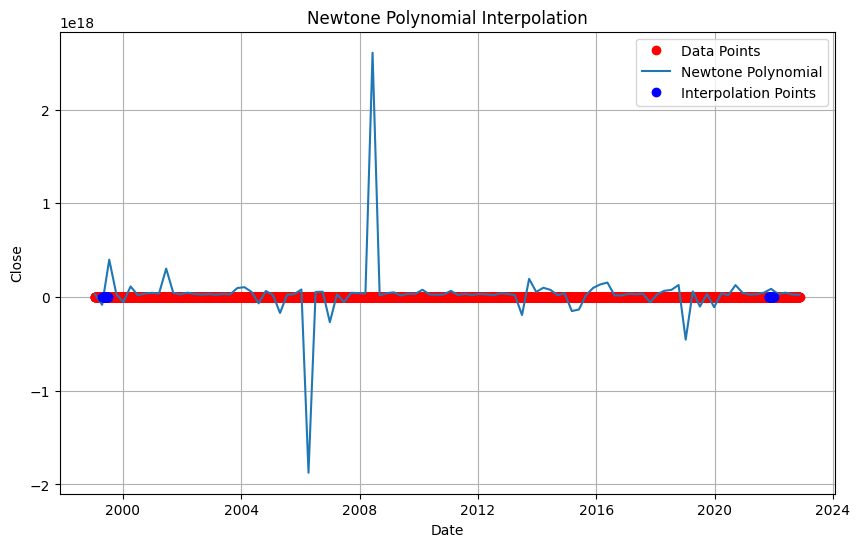

In [90]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_newton, label='Newtone Polynomial')
plt.plot(df_top10.index, df_top10['Close'], 'bo', label='Interpolation Points')  # Add interpolation points
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Newtone Polynomial Interpolation')
plt.legend()
plt.grid(True)
plt.show()

### Задание:
- Сравните результаты применения полинома Ньютона с полиномом Лагранжа. В чем основные различия?
- Что происходит, когда вы меняете порядок интерполяции?

1. При одинаковом наборе точек и порядке оба метода дают одинаковый результат, поскольку строят один и тот же полином. Однако они отличаются по удобству вычислений.
2. Метод Лагранжа требует пересчёта всего выражения при добавлении новых точек, что неудобно при работе с большим количеством данных.
3. Метод Ньютона, благодаря разделённым разностям, позволяет добавлять точки без полного пересчёта полинома, что экономит время и ресурсы.
4. У меня что-то пошло не так :3



---

## **5. Интерполяция кубическими сплайнами**

### Обзор метода:
Интерполяция кубическими сплайнами сопоставляет данные с кусочно-кубической функцией, обеспечивая плавные переходы между точками. Этот метод часто обеспечивает более плавную аппроксимацию, чем полиномиальные методы.

### Реализация:

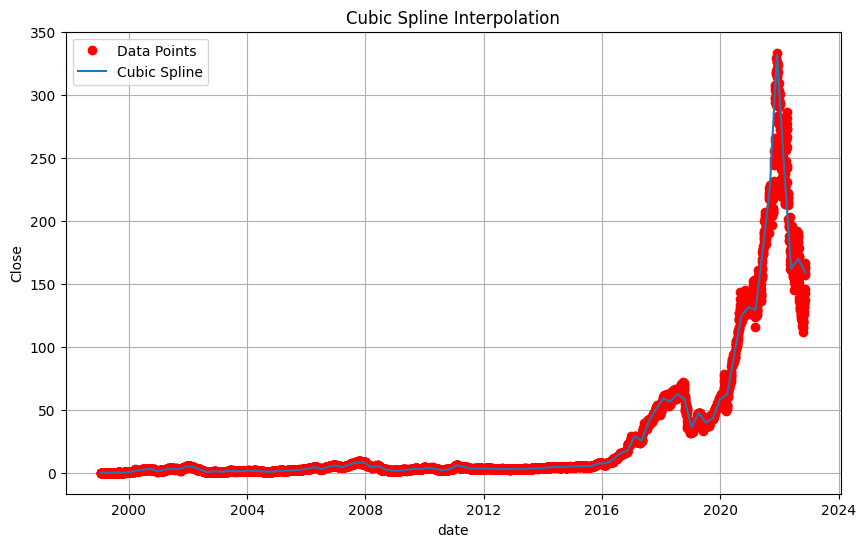

In [91]:
from scipy.interpolate import CubicSpline

# Create the Cubic Spline interpolator
cubic_spline = CubicSpline(df.index, df['Close'])

# Calculate interpolated values
closing_spline = cubic_spline(date_range)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_spline, label='Cubic Spline')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid(True)
plt.show()

### Задача:
- Сравните кубическую сплайновую интерполяцию с другими методами. Как она позволяет более эффективно обрабатывать данные?
1. В отличие от Лагранжа и Ньютона, кубический сплайн использует кусочно-полиномиальные функции третьей степени для каждой пары соседних точек.
2. Это позволяет избежать сильных колебаний на краях интервала.
3. Сплайн-график более гладкий и естественный, особенно для данных с выбросами или резкими изменениями.
- Как бы вы применили этот метод к точкам данных с выбросами?
1. Сплайн лучше подходит для большого количества точек, так как его вычислительная сложность ниже по сравнению с методами Лагранжа и Ньютона.
2. Он более устойчив к изменению порядка интерполяции и не требует большого количества точек для достижения плавного результата.

---

## **6. Аппроксимация методом наименьших квадратов**

### Обзор метода:
Приближение методом наименьших квадратов минимизирует сумму квадратов различий между наблюдаемыми точками данных и моделью.

### Реализация:

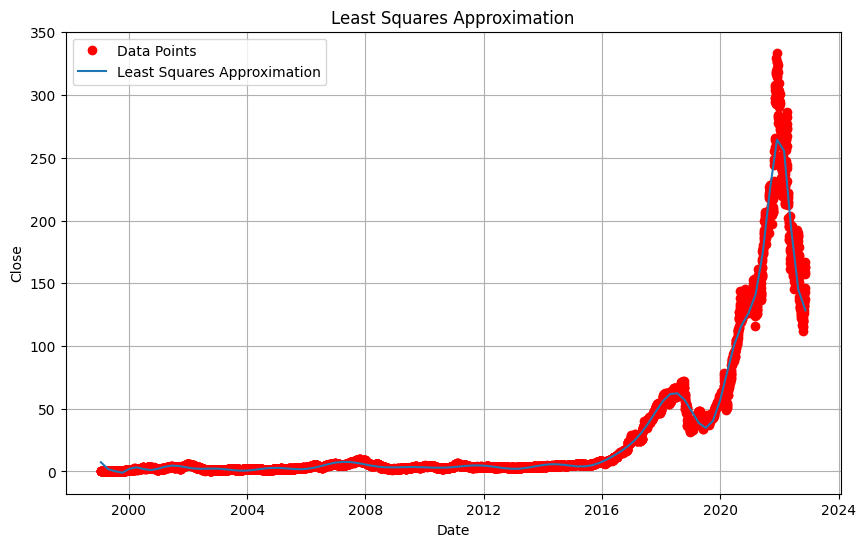

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import pandas as pd

# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Fit a least squares polynomial of degree 2
p = Polynomial.fit(dates_numeric, df['Close'], 30)

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values
closing_least_squares = p(date_range)

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_least_squares, label='Least Squares Approximation')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Least Squares Approximation')
plt.legend()
plt.grid(True)
plt.show()

Теперь попробуем выполнить тоже самое, но логарифмической функцией

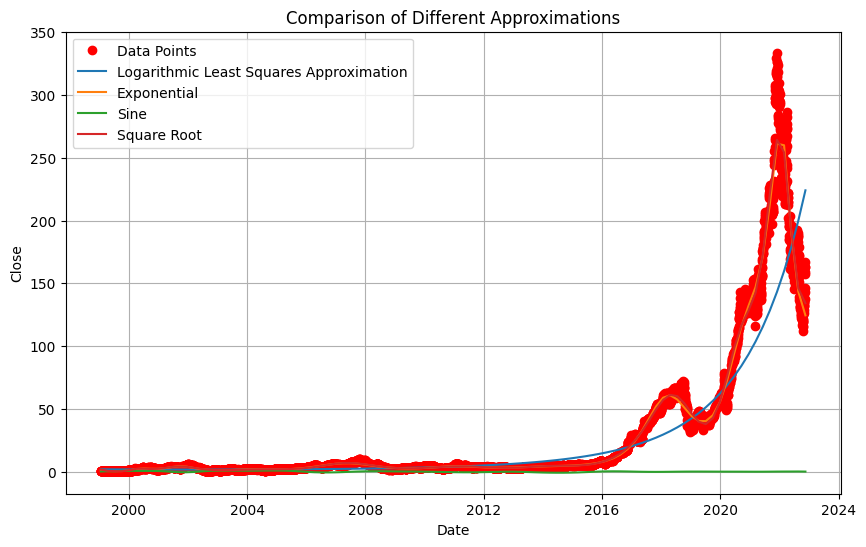

In [104]:
# Logarithmic approximation for least squares method
# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Logarithmic approximation for least squares method
# Transform 'Close' values using the natural logarithm
log_close = np.log(df['Close'])

# Fit a least squares polynomial of degree 2 to the log-transformed data
p_log = Polynomial.fit(dates_numeric, log_close, 2)

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values for the log-transformed polynomial
log_close_least_squares = p_log(date_range)

# Convert back from log scale to original scale
log_close_least_squares = np.exp(log_close_least_squares)

# Exponential approximation
exp_close = np.log(df['Close'])
p_exp = Polynomial.fit(dates_numeric, exp_close, 30)
exp_approx = np.exp(p_exp(date_range))

# Sine (trigonometric) approximation
sin_close = np.sin(df['Close'])
p_sin = Polynomial.fit(dates_numeric, sin_close, 30)
sin_approx = np.sin(p_sin(date_range))

# Square root approximation
sqrt_close = np.sqrt(df['Close'])
p_sqrt = Polynomial.fit(dates_numeric, sqrt_close, 30)
sqrt_approx = np.square(p_sqrt(date_range))

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, log_close_least_squares, label='Logarithmic Least Squares Approximation')
plt.plot(date_range, exp_approx, label='Exponential')
plt.plot(date_range, sin_approx, label='Sine')
plt.plot(date_range, sqrt_approx, label='Square Root')

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Comparison of Different Approximations')
plt.legend()
plt.grid(True)
plt.show()

### Задача:
- Попробуйте использовать разные степени многочлена. Как улучшается или ухудшается приближение?
- Дополнительно Вы можете попробовать использовать различные функции для аппроксимации (экспоненциальную, тригонометрическую и т.д.).

1. При увеличении степени приближение улучшается, но появляются сильные колебания по краям функции. Уменьшение степени делают функцию более гладкой.
2. Экспоненциальная и корнем приближают лучше


---

## **7. Приближение по наименьшим модулям**

### Обзор метода:
Метод наименьших модулей минимизирует сумму абсолютных различий (а не квадратичных различий) между моделью и данными.

### Реализация:

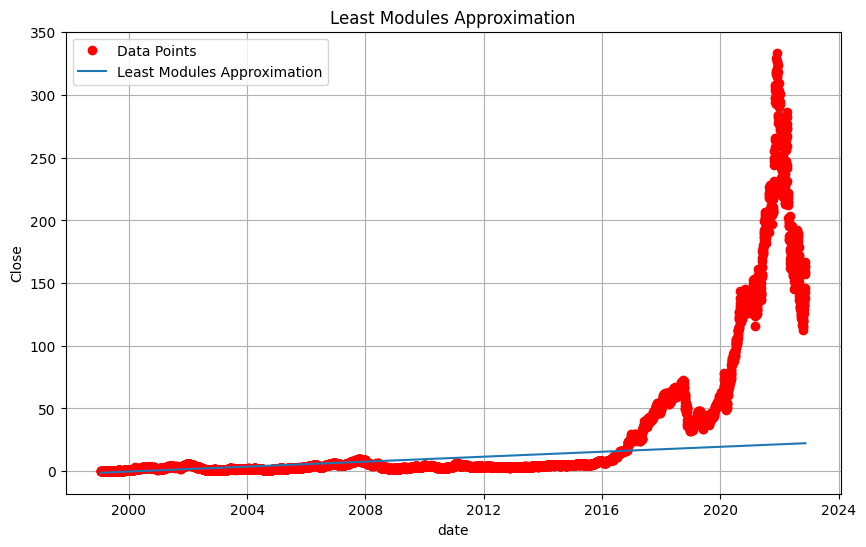

In [110]:
from scipy.optimize import minimize

def least_modules_model(x, years, close):
    # Simple linear model: f(x) = ax + b
    a, b = x
    return sum(abs(a * years + b - close))

# Initial guess for the parameters
initial_guess = [1, 1]

# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Minimize the absolute difference (Least Modules)
result = minimize(least_modules_model, initial_guess, args=(dates_numeric, df['Close']))
a, b = result.x

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values
closing_least_modules = a * date_range + b

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_least_modules, label='Least Modules Approximation')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Least Modules Approximation')
plt.legend()
plt.grid(True)
plt.show()

### Задача:
- Как ведет себя метод наименьших модулей по сравнению с методом наименьших квадратов?

1. Метод наименьших модулей предпочтительнее для данных с выбросами.
2. Для плавных данных без аномалий метод наименьших квадратов обеспечивает более точное приближение.

---

## **8. Сигмовидные методы аппроксимации**

### Обзор метода:
Сигмовидные функции часто используются для моделирования роста. Этот метод аппроксимирует данные логистической функцией.

### Реализация:

*Тем, кто найдёт и исправит ошибки в реализации, чтобы аппроксимации выглядели лучше - плюс в карму и в опыт* 😊

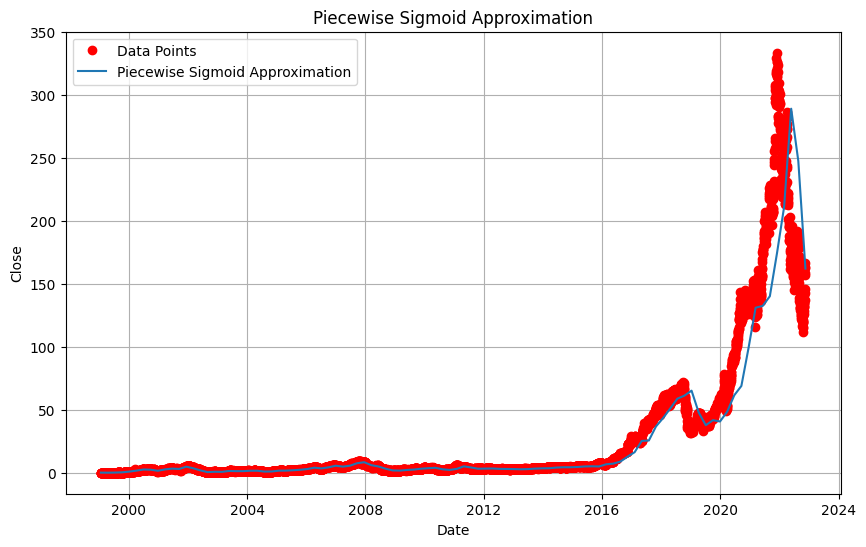

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit
import pandas as pd

# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch
dates_numeric = np.array(dates_numeric)  # Convert to numpy array

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + expit(-x))

# Define the piecewise approximation function using a combination of sigmoid functions
def piecewise_approximation_function(x, params, n_pieces):
    piece_length = len(x) // n_pieces
    y = np.zeros_like(x, dtype=float)
    for i in range(n_pieces):
        start = i * piece_length
        end = (i + 1) * piece_length if i < n_pieces - 1 else len(x)
        a = params[i * 3]
        b = params[i * 3 + 1]
        c = params[i * 3 + 2]
        y[start:end] = c * sigmoid(a * x[start:end] + b)
    return y

# Define the loss function to minimize
def loss(params):
    n_pieces = len(params) // 3
    y_pred = piecewise_approximation_function(dates_numeric, params, n_pieces)
    return np.mean((df['Close'] - y_pred) ** 2)

# Initial parameters for optimization
n_pieces = 100  # Number of pieces to use
initial_params = np.random.randn(n_pieces * 3)

# Optimize the parameters to fit the data
result = minimize(loss, initial_params, method='L-BFGS-B')
optimized_params = result.x

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values for the optimized approximation function
closing_least_modules = piecewise_approximation_function(date_range, optimized_params, n_pieces)

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_least_modules, label='Piecewise Sigmoid Approximation')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Piecewise Sigmoid Approximation')
plt.legend()
plt.grid(True)
plt.show()

### Задача:
- Насколько хорошо сигмовидная функция соответствует данным по сравнению с полиномиальными методами?
- Попробуйте настроить параметры, чтобы увидеть, как они влияют на кривую.

1. Соответствует хорошо, но присутствует небольшое сдвиг графика относительно реальных данных.
2. Изменение параметра n_pieces меняет количество "ступенек" и делает график более точным

---

## **9. Корни полинома Чебышева для интерполяции**

### Обзор метода:
Полиномы Чебышева используются для минимизации погрешности аппроксимации. Используя их корни, вы можете выполнять более эффективную интерполяцию.

### Реализация:

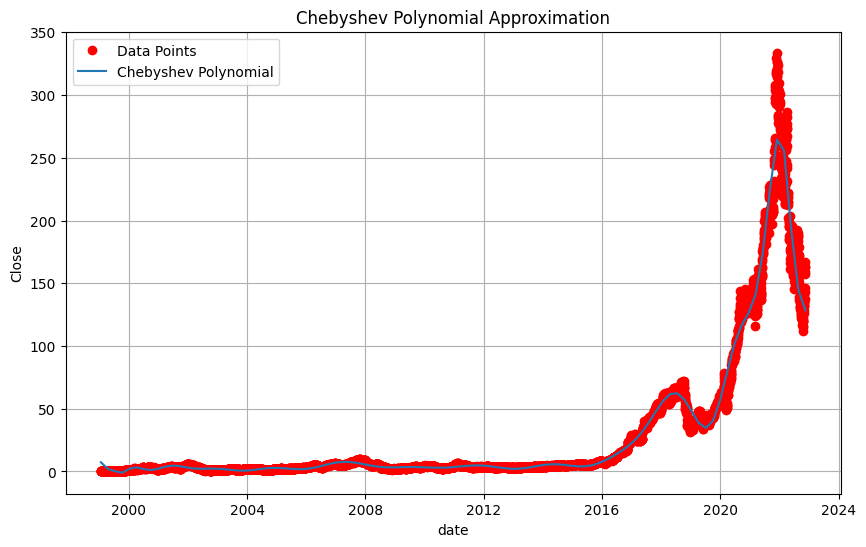

In [119]:
from numpy.polynomial.chebyshev import Chebyshev

# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Chebyshev interpolation method
chebyshev_poly = Chebyshev.fit(dates_numeric, df['Close'], deg=30)

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values
closing_chebyshev = chebyshev_poly(date_range)

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_chebyshev, label='Chebyshev Polynomial')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Chebyshev Polynomial Approximation')
plt.legend()
plt.grid(True)
plt.show()

### Задача:
- Чем интерполяция по Чебышеву отличается от полиномиальной интерполяции? Какими преимуществами она обладает?

Интерполяция по Чебышеву отличается выбором узлов — они распределены не равномерно, а по корням многочлена Чебышева. Это снижает осцилляции на краях интервала, обеспечивая более стабильное и точное приближение.

---

## **10. Заключение и анализ**

В этом разделе предлагается сравнить различные методы:
- Какой метод лучше всего подходит для данного набора данных?
- Какой метод является наиболее эффективным с точки зрения вычислений?
- Какая модель дает наиболее точные прогнозы при обобщении на невидимые данные?

1. Интерполяция кубическими сплайнами, если судить по полученным графикам.
2. Метод наименьших квадратов (МНК) – самый быстрый и простой для вычислений, особенно при линейной или низкостепенной аппроксимации.
3. Сигмовидная функция или кубические сплайны – они лучше обобщают данные и меньше подвержены осцилляциям на краях по сравнению с полиномами высокой степени.

---

## Экстра практика на тех же данных. Давайте попробуем провести экстра-поляцию!🧙

### Сначала давайте попробуем провести экстраполяцию теми же методами, что и раньше, и построить график результата

In [ ]:
# All polynomials built before:
polonomials = [poly_lagrange, newton_interpolator, cubic_spline, p, p_log, a, b, chebyshev_poly]
polonomial_labels = ['Lagrange', 'Newton', 'Spline', 'Least Squares', 'Logarithmic Least Squares', 'Least Modules', 'Sigmoid', 'Chebyshev'] 

In [ ]:
# Define a new range of dates for extrapolation
extrapolation_range = np.linspace(dates_numeric[-1], dates_numeric[-1] + (dates_numeric[-1] - dates_numeric[0]), 100)

# Calculate extrapolated values using the least squares polynomial
extrapolated_values = p(extrapolation_range)

# Convert extrapolation_range back to datetime for plotting
extrapolation_dates = pd.to_datetime(extrapolation_range * 10**9)

# Apply each polinomial to the extrapolation range
# YOUR CODE HERE

# Plot the original data and the extrapolated values by each of the polynomials
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_least_squares, label='Least Squares Approximation') # add more
plt.plot(extrapolation_dates, extrapolated_values, 'g--', label='Extrapolated Values')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Extrapolation using Least Squares Polynomial')
plt.legend()
plt.grid(True)
plt.show()

### А теперь попробуем добавить немного машинного обучения, чтобы предсказывать значения

Не надо бояться машинного обучения как чёрной магии, под капотом у неё всё те же численные методы (ака. вычислительная математика).

In [ ]:
%pip install sklearn
%pip install tensorflow

In [ ]:
output_var = pd.DataFrame(df['Close'])

In [ ]:
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

In [ ]:
feature_transform.shape

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=10) 
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
import tensorflow as tf
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

In [ ]:
y_pred= lstm.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

Какие выводы Вы можете сделать по этим примерам и по всей практической работе в целом? Что нового Вы лично для себя узнали?

ВАШ КОММЕНТАРИЙ ЗДЕСЬ